# Estimativa de chuva
## Aprendizado de máquina - Trabalho 2

* Autor: Gabriel de Oliveira Pontarolo
* GRR20203895

## Carrega o dataset

In [26]:
import pandas as pd  
import numpy as np

complete_df = pd.read_csv("/home/gab/projetos/machine-learning/rain-estimation/Dados_Radar_Estacao_Completo_2018_2022.csv")
complete_df

,Unnamed: 0,azimuth,range,time,elevation,sweep,UH,UV,DBZH,DBZV,...,y,z,lat,lon,alt,Est,Tp_est,latitude,longitude,distancia
0,0,10,220250,2018-01-09 12:30:00,0.5,0,NaN,NaN,NaN,NaN,...,216798.04,4775.95,-22.919829,-53.156094,4895.951230,Loanda,0.0,-22.92,-53.15,219
1,1,15,73750,2018-01-09 12:30:00,0.5,0,-8.03,NaN,-9.92,NaN,...,71227.13,963.36,-24.229322,-53.341064,1083.357738,Porto_Formosa,0.0,-24.23,-53.33,74
2,2,29,226750,2018-01-09 12:30:00,0.5,0,6.00,5.17,4.74,3.38,...,198219.24,5003.38,-23.083564,-52.455313,5123.382761,Paranavai,0.2,-23.09,-52.44,230
3,3,52,144750,2018-01-09 12:30:00,0.5,0,NaN,NaN,NaN,NaN,...,89091.74,2496.08,-24.064595,-52.406170,2616.080788,Campo_Mourao,0.0,-24.07,-52.40,152
4,4,57,66750,2018-01-09 12:30:00,0.5,0,NaN,-8.08,NaN,NaN,...,36350.03,844.52,-24.542079,-52.975897,964.515047,Ubirata,0.0,-24.55,-52.97,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856374,2856374,149,121500,2022-12-22 12:45:00,0.5,0,4.77,4.75,3.81,4.09,...,-104121.77,1928.94,-25.805085,-52.904342,2048.943578,Bela_Vista_Jusante,0.0,-25.81,-52.91,124
2856375,2856375,176,73500,2022-12-22 12:45:00,0.5,0,0.00,-1.49,-1.73,-2.94,...,-73310.80,959.20,-25.529292,-53.478188,1079.201517,Reservatorio_Salto_Caxias,0.0,-25.53,-53.48,73
2856376,2856376,297,21500,2022-12-22 12:45:00,0.5,0,27.52,30.50,NaN,NaN,...,9760.19,214.65,-24.782105,-53.719021,334.650059,Toledo,0.0,-24.78,-53.72,23
2856377,2856377,320,115500,2022-12-22 12:45:00,0.5,0,3.77,4.00,2.45,2.17,...,88458.82,1792.68,-24.072698,-54.260372,1912.675465,Guaira,0.0,-24.07,-54.26,119


## Tratamento dos dados

In [27]:
# remove unnecessary columns
clean_df = complete_df.copy()
clean_df.drop(columns=['Unnamed: 0', 'azimuth', 'elevation', 'range', 'sweep', 'Est', 'x', 'y', 'z', 'lat', 'lon', 'alt', 'latitude', 'longitude', 'distancia'], inplace=True)
clean_df = clean_df[clean_df['Tp_est'] != 0]
clean_df

,time,UH,UV,DBZH,DBZV,KDP,ZDR,RHOHV,Tp_est
2,2018-01-09 12:30:00,6.00,5.17,4.74,3.38,1.84,1.33,0.68,0.2
21,2018-01-09 13:00:00,NaN,NaN,NaN,NaN,NaN,0.09,0.55,0.2
40,2018-01-09 13:30:00,NaN,NaN,NaN,NaN,NaN,1.28,0.49,0.2
59,2018-01-09 14:00:00,5.32,5.60,2.11,1.82,0.25,0.22,0.73,0.2
76,2018-01-09 14:30:00,NaN,NaN,NaN,NaN,NaN,0.22,0.46,0.8
...,...,...,...,...,...,...,...,...,...
2854605,2022-12-20 21:15:00,NaN,NaN,NaN,NaN,NaN,4.45,0.41,2.8
2854624,2022-12-20 21:30:00,NaN,NaN,NaN,NaN,NaN,-1.06,0.39,0.2
2854643,2022-12-20 21:45:00,NaN,NaN,NaN,NaN,NaN,0.50,0.21,0.2
2854657,2022-12-20 22:00:00,NaN,NaN,NaN,NaN,NaN,3.10,0.51,0.2


In [28]:
# split data into train and test
train = clean_df.copy()
train = train[train['time'] < '2022-01-01']
train.drop(['time'], axis=1, inplace=True)

test = clean_df.copy()
test = test[test['time'] >= '2022-01-01']
test.dropna(inplace=True)
test.drop(['time'], axis=1, inplace=True)

len(test), len(train)

(10900, 88928)

## Visualização da distribuição dos dados

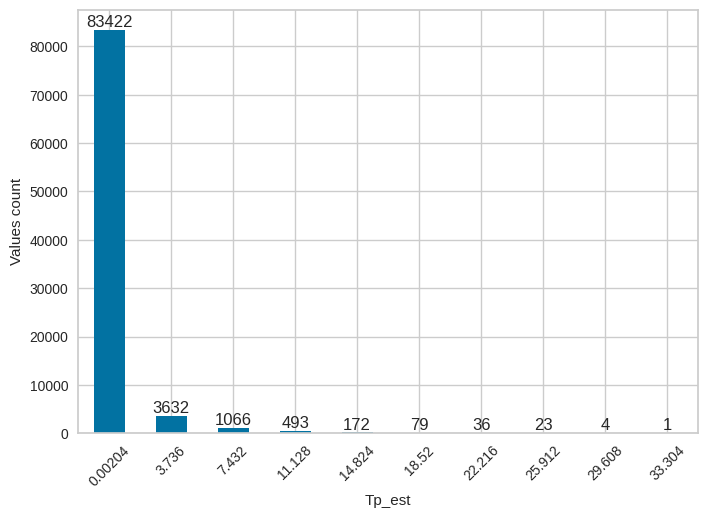

In [29]:
import matplotlib.pyplot as plt

def visualize(df, column):
    # count column values into bins
    count = df[column].value_counts(bins=10)
    count.index = count.index.astype(str)
    count.index = count.index.str.split(',').str[0].str.replace('(', '')
    count.plot(kind='bar')
    plt.xticks(rotation=45)
    plt.ylabel('Values count')
    plt.xlabel(df[column].name)
    plt.bar_label(plt.gca().containers[0])

    plt.show()

visualize(train, 'Tp_est')

# train = train.fillna(method='ffill')

# from scipy import stats
# # remove outliers
# train = train[(np.abs(stats.zscore(train['Tp_est'])) < 3)]
# visualize(train, 'Tp_est')

# from sklearn.utils import resample
# # oversample minority class
# train_majority = train[train['Tp_est'] < 1]
# train_minority = train[train['Tp_est'] >= 1]

# train_minority_upsampled = resample(train_minority,
#                                     replace=True,
#                                     n_samples=len(train_majority*10),
#                                     random_state=123)

# train_oversampled = pd.concat([train_majority, train_minority_upsampled])
# visualize(train_oversampled, 'Tp_est')


## Configuração do modelo

In [30]:
import pycaret.regression as pyr

exp = pyr.RegressionExperiment().setup(
    session_id = 123,
    experiment_name = 'rain-estimation',
    preprocess = True,
    n_jobs = -1, # use all cpu cores

    data = train,
    test_data = test,
    target ='Tp_est',

    imputation_type = 'simple', 
    numeric_imputation = 'mean', # imputation of missing Nan values

    remove_outliers = True,
    outliers_method = 'lof', # uses sklearn LocalOutlierFactor
    outliers_threshold = 0.05,

    normalize = True,
    normalize_method = 'zscore', # normalize data using z-score

    fold_strategy = 'kfold', # kfold cross validation
    fold = 10,
    fold_shuffle = True,

    polynomial_features=True, # add polynomial features
    polynomial_degree=2,
)

,Description,Value
0,Session id,123
1,Target,Tp_est
2,Target type,Regression
3,Original data shape,"(99828, 8)"
4,Transformed data shape,"(95381, 36)"
5,Transformed train set shape,"(84481, 36)"
6,Transformed test set shape,"(10900, 36)"
7,Numeric features,7
8,Rows with missing values,53.8%
9,Preprocess,True


## Treina um regressor linear

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0598,4.0042,2.0011,0.0045,0.5432,2.3363
1,1.0600,4.1097,2.0272,0.0064,0.5418,2.2788
2,1.0570,3.9410,1.9852,-0.0051,0.5418,2.3290
3,1.0772,4.2337,2.0576,0.0028,0.5481,2.3249
4,1.0752,4.3290,2.0806,0.0058,0.5449,2.2754
5,1.0617,4.0492,2.0123,0.0098,0.5420,2.2944
6,1.0681,4.2416,2.0595,0.0040,0.5448,2.3222
7,1.0807,4.3327,2.0815,0.0046,0.5480,2.2922
8,1.0494,3.8251,1.9558,0.0103,0.5380,2.3019


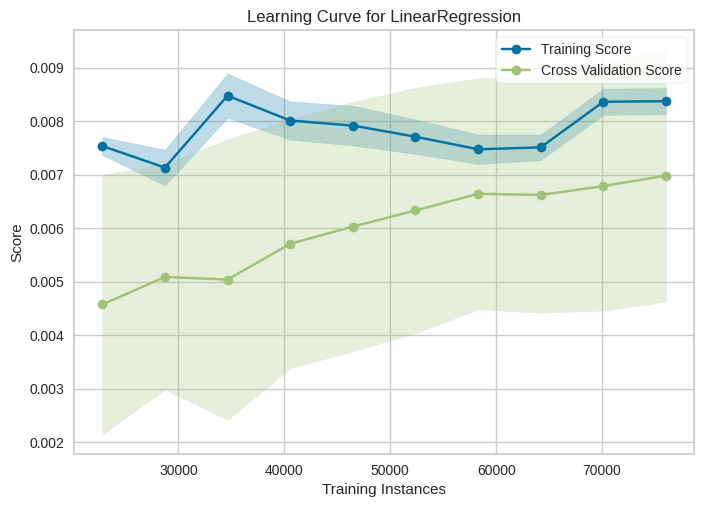

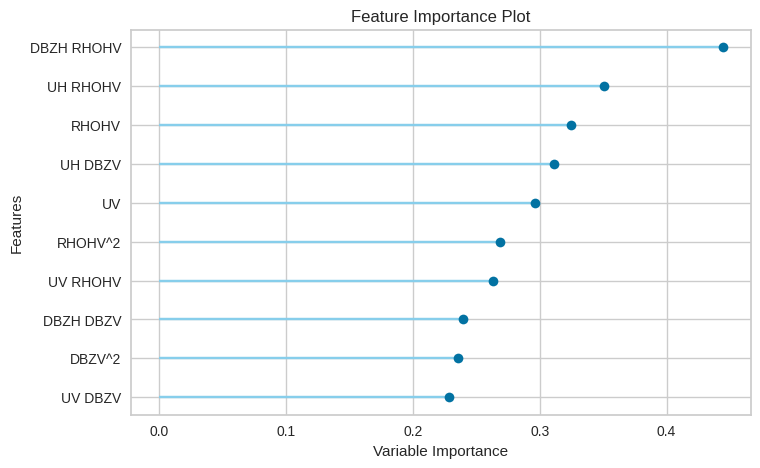

In [31]:
linear_regression = exp.create_model('lr')

exp.plot_model(linear_regression, plot = 'learning')
exp.plot_model(linear_regression, plot = 'feature')

In [32]:
from datetime import datetime

# save model
exp.save_model(linear_regression, 'linear_regression_' + datetime.now().strftime("%Y-%m-%d_%H:%M:%S"))

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['UH', 'UV', 'DBZH', 'DBZV', 'KDP',
                                              'ZDR', 'RHOHV'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('remove_outliers',
                  TransformerWrapper(transformer=RemoveOutliers(method='lof',
                                                                random_state=123))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', LinearRegression(n_jobs=-1))]),
 'linear_regression_2023-10-08_19:41:52.pkl')

## Testa o modelo

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1.1183,4.1939,2.0479,0.0033,0.5466,2.1149


Text(0, 0.5, 'Prediction')

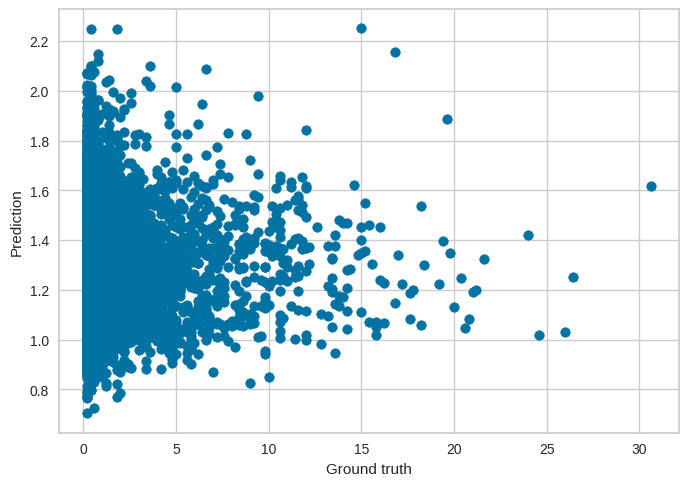

In [34]:
test_pred = exp.predict_model(linear_regression) # predict on test dataset

# plot prediction scatter
plt.scatter(test_pred['Tp_est'], test_pred['prediction_label'])
plt.xlabel('Ground truth')
plt.ylabel('Prediction')